In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

In [2]:
df = pd.read_pickle("annotate_emotion_phase_1b_sample_dataset.p")
df

,name,id,title,contentText,mediaType,mediaTypeAttributes,timePublished,language,imageUrls,dataTags,embeddedUrls,annotate_emotion
0,messages/b58ae956612145b5b882fc1c40d2d489361cbf7a,b58ae956612145b5b882fc1c40d2d489361cbf7a,@ZemmourEric GRAND SECRET HISTORIQUE https://t...,@ZemmourEric GRAND SECRET HISTORIQUE https://t...,Twitter,{'twitterData': {'twitterAuthorScreenname': 'a...,1644889505000,English,[http://pbs.twimg.com/media/FLmgPR1XMAAR_VG.jp...,[Brandwatch Scenario 1 - FR TWT],NaN,[{'id': 'b58ae956612145b5b882fc1c40d2d489361cb...
1,messages/20a9ccb81cc3dd5626339cfd71b5fdaefd9b0014,20a9ccb81cc3dd5626339cfd71b5fdaefd9b0014,RT @UPR_Asselineau #PasseVaccinal #GenerationA...,RT @UPR_Asselineau #PasseVaccinal #GenerationA...,Twitter,{'twitterData': {'twitterAuthorScreenname': 'd...,1644883364000,English,[http://pbs.twimg.com/media/FG-u3lYXwAQ3f1Y.jpg],[Brandwatch Scenario 1 - FR TWT],NaN,[{'id': '20a9ccb81cc3dd5626339cfd71b5fdaefd9b0...
2,messages/c7ca4cfbf926ea4c8e3e0eff2f816fda31ca0989,c7ca4cfbf926ea4c8e3e0eff2f816fda31ca0989,Lol,Lol,Twitter,{'twitterData': {'twitterAuthorScreenname': '2...,1644917031000,English,NaN,[Brandwatch Scenario 1 - FR TWT],NaN,[{'id': 'c7ca4cfbf926ea4c8e3e0eff2f816fda31ca0...
3,messages/fe49fd3041e51f955b7c1ae2a9ae2dd8eb0aed91,fe49fd3041e51f955b7c1ae2a9ae2dd8eb0aed91,#100000Conquérants #ZemmourPresident #Cryptos,#100000Conquérants #ZemmourPresident #Cryptos,Twitter,{'twitterData': {'twitterAuthorScreenname': '0...,1644918403000,English,NaN,[Brandwatch Scenario 1 - FR TWT],NaN,[{'id': 'fe49fd3041e51f955b7c1ae2a9ae2dd8eb0ae...
4,messages/3f87d41a7c4fa81b08958c1351543c9c6df8e66d,3f87d41a7c4fa81b08958c1351543c9c6df8e66d,@ZemmourEric Timming parfait !🤣🤣 https://t.co/...,@ZemmourEric Timming parfait !🤣🤣 https://t.co/...,Twitter,{'twitterData': {'twitterAuthorScreenname': '7...,1644924039000,English,[http://pbs.twimg.com/media/FLoj-ulX0AEeqZf.jpg],[Brandwatch Scenario 1 - FR TWT],NaN,[{'id': '3f87d41a7c4fa81b08958c1351543c9c6df8e...
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,messages/da91a9e0136e65c71d063ca86153f27e10ca6388,da91a9e0136e65c71d063ca86153f27e10ca6388,RT @avecValerie #MarinePoutine #FaceABFM https...,RT @avecValerie #MarinePoutine #FaceABFM https...,Twitter,{'twitterData': {'twitterAuthorScreenname': 'c...,1646221308000,English,[http://pbs.twimg.com/media/FMymrGXX0AwUhmo.jpg],[Brandwatch Scenario 1 - FR TWT],NaN,[{'id': 'da91a9e0136e65c71d063ca86153f27e10ca6...
29996,messages/b71be308b001ab22be433b16cb7db08fd7b9e8e0,b71be308b001ab22be433b16cb7db08fd7b9e8e0,"@EmmanuelMacron Where is your help, #Europe & ...","@EmmanuelMacron Where is your help, #Europe & ...",Twitter,{'twitterData': {'twitterAuthorScreenname': 'd...,1646223060000,English,NaN,[Brandwatch Scenario 1 - FR TWT],NaN,[{'id': 'b71be308b001ab22be433b16cb7db08fd7b9e...
29997,messages/5ff93feb549ed09492d4e69e33d03afafe503cb9,5ff93feb549ed09492d4e69e33d03afafe503cb9,#ZemmourPresident2022,#ZemmourPresident2022,Twitter,{'twitterData': {'twitterAuthorScreenname': '2...,1646225929000,English,NaN,[Brandwatch Scenario 1 - FR TWT],NaN,[{'id': '5ff93feb549ed09492d4e69e33d03afafe503...
29998,messages/7708c1b0101c4afbf7d40900d2a3780ac3733148,7708c1b0101c4afbf7d40900d2a3780ac3733148,@ZemmourEric Amen 🙏,@ZemmourEric Amen 🙏,Twitter,{'twitterData': {'twitterAuthorScreenname': '8...,1646222800000,English,NaN,[Brandwatch Scenario 1 - FR TWT],NaN,[{'id': '7708c1b0101c4afbf7d40900d2a3780ac3733...


In [3]:
structural_features_raw = []
for row in tqdm(df.itertuples(), total=len(df)):
    twitter_data = row[6]
    twitter_features_dict = twitter_data['twitterData']
    structural_features_raw.append(twitter_features_dict)

structural_features_df = pd.DataFrame(structural_features_raw, index=df.index)
result_df = pd.concat([df, structural_features_df], axis=1)

# result_df = df

result_df['timePublished2'] = [datetime.fromtimestamp(time/1000) for time in result_df['timePublished'].values]
dates = [pd.to_datetime(dt).date() for dt in result_df['timePublished2'].values]
result_df['date'] = dates

result_df = result_df.sort_values(by='date')
result_df

100%|██████████| 30000/30000 [00:00<00:00, 1002846.21it/s]


,name,id,title,contentText,mediaType,mediaTypeAttributes,timePublished,language,imageUrls,dataTags,...,twitterAuthorScreenname,tweetId,followingCount,followerCount,engagementType,engagementParentId,mentionedUsers,retweetCount,timePublished2,date
0,messages/b58ae956612145b5b882fc1c40d2d489361cbf7a,b58ae956612145b5b882fc1c40d2d489361cbf7a,@ZemmourEric GRAND SECRET HISTORIQUE https://t...,@ZemmourEric GRAND SECRET HISTORIQUE https://t...,Twitter,{'twitterData': {'twitterAuthorScreenname': 'a...,1644889505000,English,[http://pbs.twimg.com/media/FLmgPR1XMAAR_VG.jp...,[Brandwatch Scenario 1 - FR TWT],...,a41aacaed554407530291771c4178da9,1493400944662433793,585.0,42.0,reply,1493295075023110144,[5daf3f0a12754339778961d1b055ac94],NaN,2022-02-14 17:45:05,2022-02-14
12750,messages/b8caf980e07e5fb317dc37bd54ad4f22e8faf96d,b8caf980e07e5fb317dc37bd54ad4f22e8faf96d,@yjadot_eng But he would be so keen to turn th...,@yjadot_eng But he would be so keen to turn th...,Twitter,{'twitterData': {'twitterAuthorScreenname': '5...,1644907954000,English,NaN,[Brandwatch Scenario 1 - FR TWT],...,58b8b0d546c84aea47eb87a6d0d3a652,1493478324332544004,260.0,14.0,reply,1493153809929064449,[1b86fe799737de32bd7fd3a431f8e409],NaN,2022-02-14 22:52:34,2022-02-14
13500,messages/abf39995020b402fc4b72151c45fef83dcbf0968,abf39995020b402fc4b72151c45fef83dcbf0968,@EmmanuelMacron Ok Nelson Monfort,@EmmanuelMacron Ok Nelson Monfort,Twitter,{'twitterData': {'twitterAuthorScreenname': '3...,1644895218000,English,NaN,[Brandwatch Scenario 1 - FR TWT],...,3f4e795050cc0c06f489bb0daea63ec7,1493424903080620033,95.0,15.0,reply,1493127967643508740,[83812c529321337e2337b5642b973628],NaN,2022-02-14 19:20:18,2022-02-14
25501,messages/f217528725e98c98c801450a0dbfa59430768fdf,f217528725e98c98c801450a0dbfa59430768fdf,@ZemmourEric GRAND REMPLACEMENT https://t.co/m...,@ZemmourEric GRAND REMPLACEMENT https://t.co/m...,Twitter,{'twitterData': {'twitterAuthorScreenname': 'a...,1644889228000,English,[http://pbs.twimg.com/media/FLmfLe9XoAE_O-4.jp...,[Brandwatch Scenario 1 - FR TWT],...,a41aacaed554407530291771c4178da9,1493399779098906626,585.0,42.0,reply,1493295075023110144,[5daf3f0a12754339778961d1b055ac94],NaN,2022-02-14 17:40:28,2022-02-14
25500,messages/a64d8e4d8d35738533e3c4174a1a895d6df5a920,a64d8e4d8d35738533e3c4174a1a895d6df5a920,@partisocialiste @Anne_Hidalgo @2022avecHidalg...,@partisocialiste @Anne_Hidalgo @2022avecHidalg...,Twitter,{'twitterData': {'twitterAuthorScreenname': '1...,1644894766000,English,[http://pbs.twimg.com/media/FLm0UECXEAoViQj.jpg],[Brandwatch Scenario 1 - FR TWT],...,1d3b879a081826c99e80247d48108c1a,1493423010270830596,438.0,283.0,reply,1482040051504660481,"[d6301f677de99f84232da88aaf835944, dc00ba7830f...",NaN,2022-02-14 19:12:46,2022-02-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11370,messages/2066dd26824fdc63865f62cd6cee1bcfece62864,2066dd26824fdc63865f62cd6cee1bcfece62864,@EmmanuelMacron STOP RUSSIAN AGGRESSION AGAINS...,@EmmanuelMacron STOP RUSSIAN AGGRESSION AGAINS...,Twitter,{'twitterData': {'twitterAuthorScreenname': '6...,1646302350000,English,NaN,[Brandwatch Scenario 1 - FR TWT],...,64833df290041b3c13f2504d5b8cf613,1499326843857641472,2.0,5.0,reply,1499116331395960835,"[83812c529321337e2337b5642b973628, 5a5f1259b4d...",NaN,2022-03-03 02:12:30,2022-03-03
11371,messages/eafd16ac7cf4c5d3d867bd31611722506db70f77,eafd16ac7cf4c5d3d867bd31611722506db70f77,#assault,#assault,Twitter,{'twitterData': {'twitterAuthorScreenname': 'd...,1646308150000,English,NaN,[Brandwatch Scenario 1 - FR TWT],...,d4f320dcde642f0cb3367ef5822cbabe,1499351171072417794,2422.0,2185.0,reply,NaN,NaN,NaN,2022-03-03 03:49:10,2022-03-03
11372,messages/2e20995a4f2429765e47f9255abaf7086c819764,2e20995a4f2429765e47f9255abaf7086c819764,@Anne_Hidalgo #MelenchonPresident2022,@Anne_Hidalgo #MelenchonPresident2022,Twitter,{'twitterData': {'twitterAuthorScreenname': '8...,1646304147000,English,NaN,[Brandwatch Scenario 1 - FR TWT],...,8e8e1e3208f8a5bf4d9a

In [4]:
filter_df = result_df[["id", "contentText", "timePublished", "timePublished2", "date", "engagementType", "annotate_emotion"]]
filter_df

,id,contentText,timePublished,timePublished2,date,engagementType,annotate_emotion
0,b58ae956612145b5b882fc1c40d2d489361cbf7a,@ZemmourEric GRAND SECRET HISTORIQUE https://t...,1644889505000,2022-02-14 17:45:05,2022-02-14,reply,[{'id': 'b58ae956612145b5b882fc1c40d2d489361cb...
12750,b8caf980e07e5fb317dc37bd54ad4f22e8faf96d,@yjadot_eng But he would be so keen to turn th...,1644907954000,2022-02-14 22:52:34,2022-02-14,reply,[{'id': 'b8caf980e07e5fb317dc37bd54ad4f22e8faf...
13500,abf39995020b402fc4b72151c45fef83dcbf0968,@EmmanuelMacron Ok Nelson Monfort,1644895218000,2022-02-14 19:20:18,2022-02-14,reply,[{'id': 'abf39995020b402fc4b72151c45fef83dcbf0...
25501,f217528725e98c98c801450a0dbfa59430768fdf,@ZemmourEric GRAND REMPLACEMENT https://t.co/m...,1644889228000,2022-02-14 17:40:28,2022-02-14,reply,[{'id': 'f217528725e98c98c801450a0dbfa59430768...
25500,a64d8e4d8d35738533e3c4174a1a895d6df5a920,@partisocialiste @Anne_Hidalgo @2022avecHidalg...,1644894766000,2022-02-14 19:12:46,2022-02-14,reply,[{'id': 'a64d8e4d8d35738533e3c4174a1a895d6df5a...
...,...,...,...,...,...,...,...
11370,2066dd26824fdc63865f62cd6cee1bcfece62864,@EmmanuelMacron STOP RUSSIAN AGGRESSION AGAINS...,1646302350000,2022-03-03 02:12:30,2022-03-03,reply,[{'id': '2066dd26824fdc63865f62cd6cee1bcfece62...
11371,eafd16ac7cf4c5d3d867bd31611722506db70f77,#assault,1646308150000,2022-03-03 03:49:10,2022-03-03,reply,[{'id': 'eafd16ac7cf4c5d3d867bd31611722506db70...
11372,2e20995a4f2429765e47f9255abaf7086c819764,@Anne_Hidalgo #MelenchonPresident2022,1646304147000,2022-03-03 02:42:27,2022-03-03,reply,[{'id': '2e20995a4f2429765e47f9255abaf7086c819...
11355,49b0cc1d5d4d21b158e3704578cd736c0fc2aa77,YAAAAAAAA,1646326610000,2022-03-03 08:56:50,2022-03-03,reply,[{'id': '49b0cc1d5d4d21b158e3704578cd736c0fc2a...


In [5]:
tweet_df = filter_df[filter_df["engagementType"] == "tweet"]
reply_df = filter_df[filter_df["engagementType"] == "reply"]
retweet_df = filter_df[filter_df["engagementType"] == "retweet"]

In [6]:
def to_num_date_df(df):
    date_list =df["date"].tolist()
    date_set = set(date_list)
    # print(date_set)

    date_dict = Counter(date_list)
    # print(date_dict)

    for k, v in date_dict.items():
        print("{}: {}".format(k, v))

    date_df = pd.DataFrame(list(date_dict.items()),
                          columns=['date','times'])
    return date_df

2022-02-15: 2
2022-02-28: 1
2022-03-01: 1
2022-03-03: 96
2022-02-14: 60
2022-02-15: 772
2022-02-16: 252
2022-02-17: 363
2022-02-18: 200
2022-02-19: 284
2022-02-26: 606
2022-02-27: 1080
2022-02-28: 4496
2022-03-01: 3227
2022-03-02: 2649
2022-03-03: 2151
2022-02-14: 7
2022-02-15: 354
2022-02-16: 867
2022-02-17: 61
2022-02-18: 11
2022-02-19: 2
2022-02-26: 1
2022-02-27: 2
2022-02-28: 8054
2022-03-01: 1130
2022-03-02: 134
2022-03-03: 3137


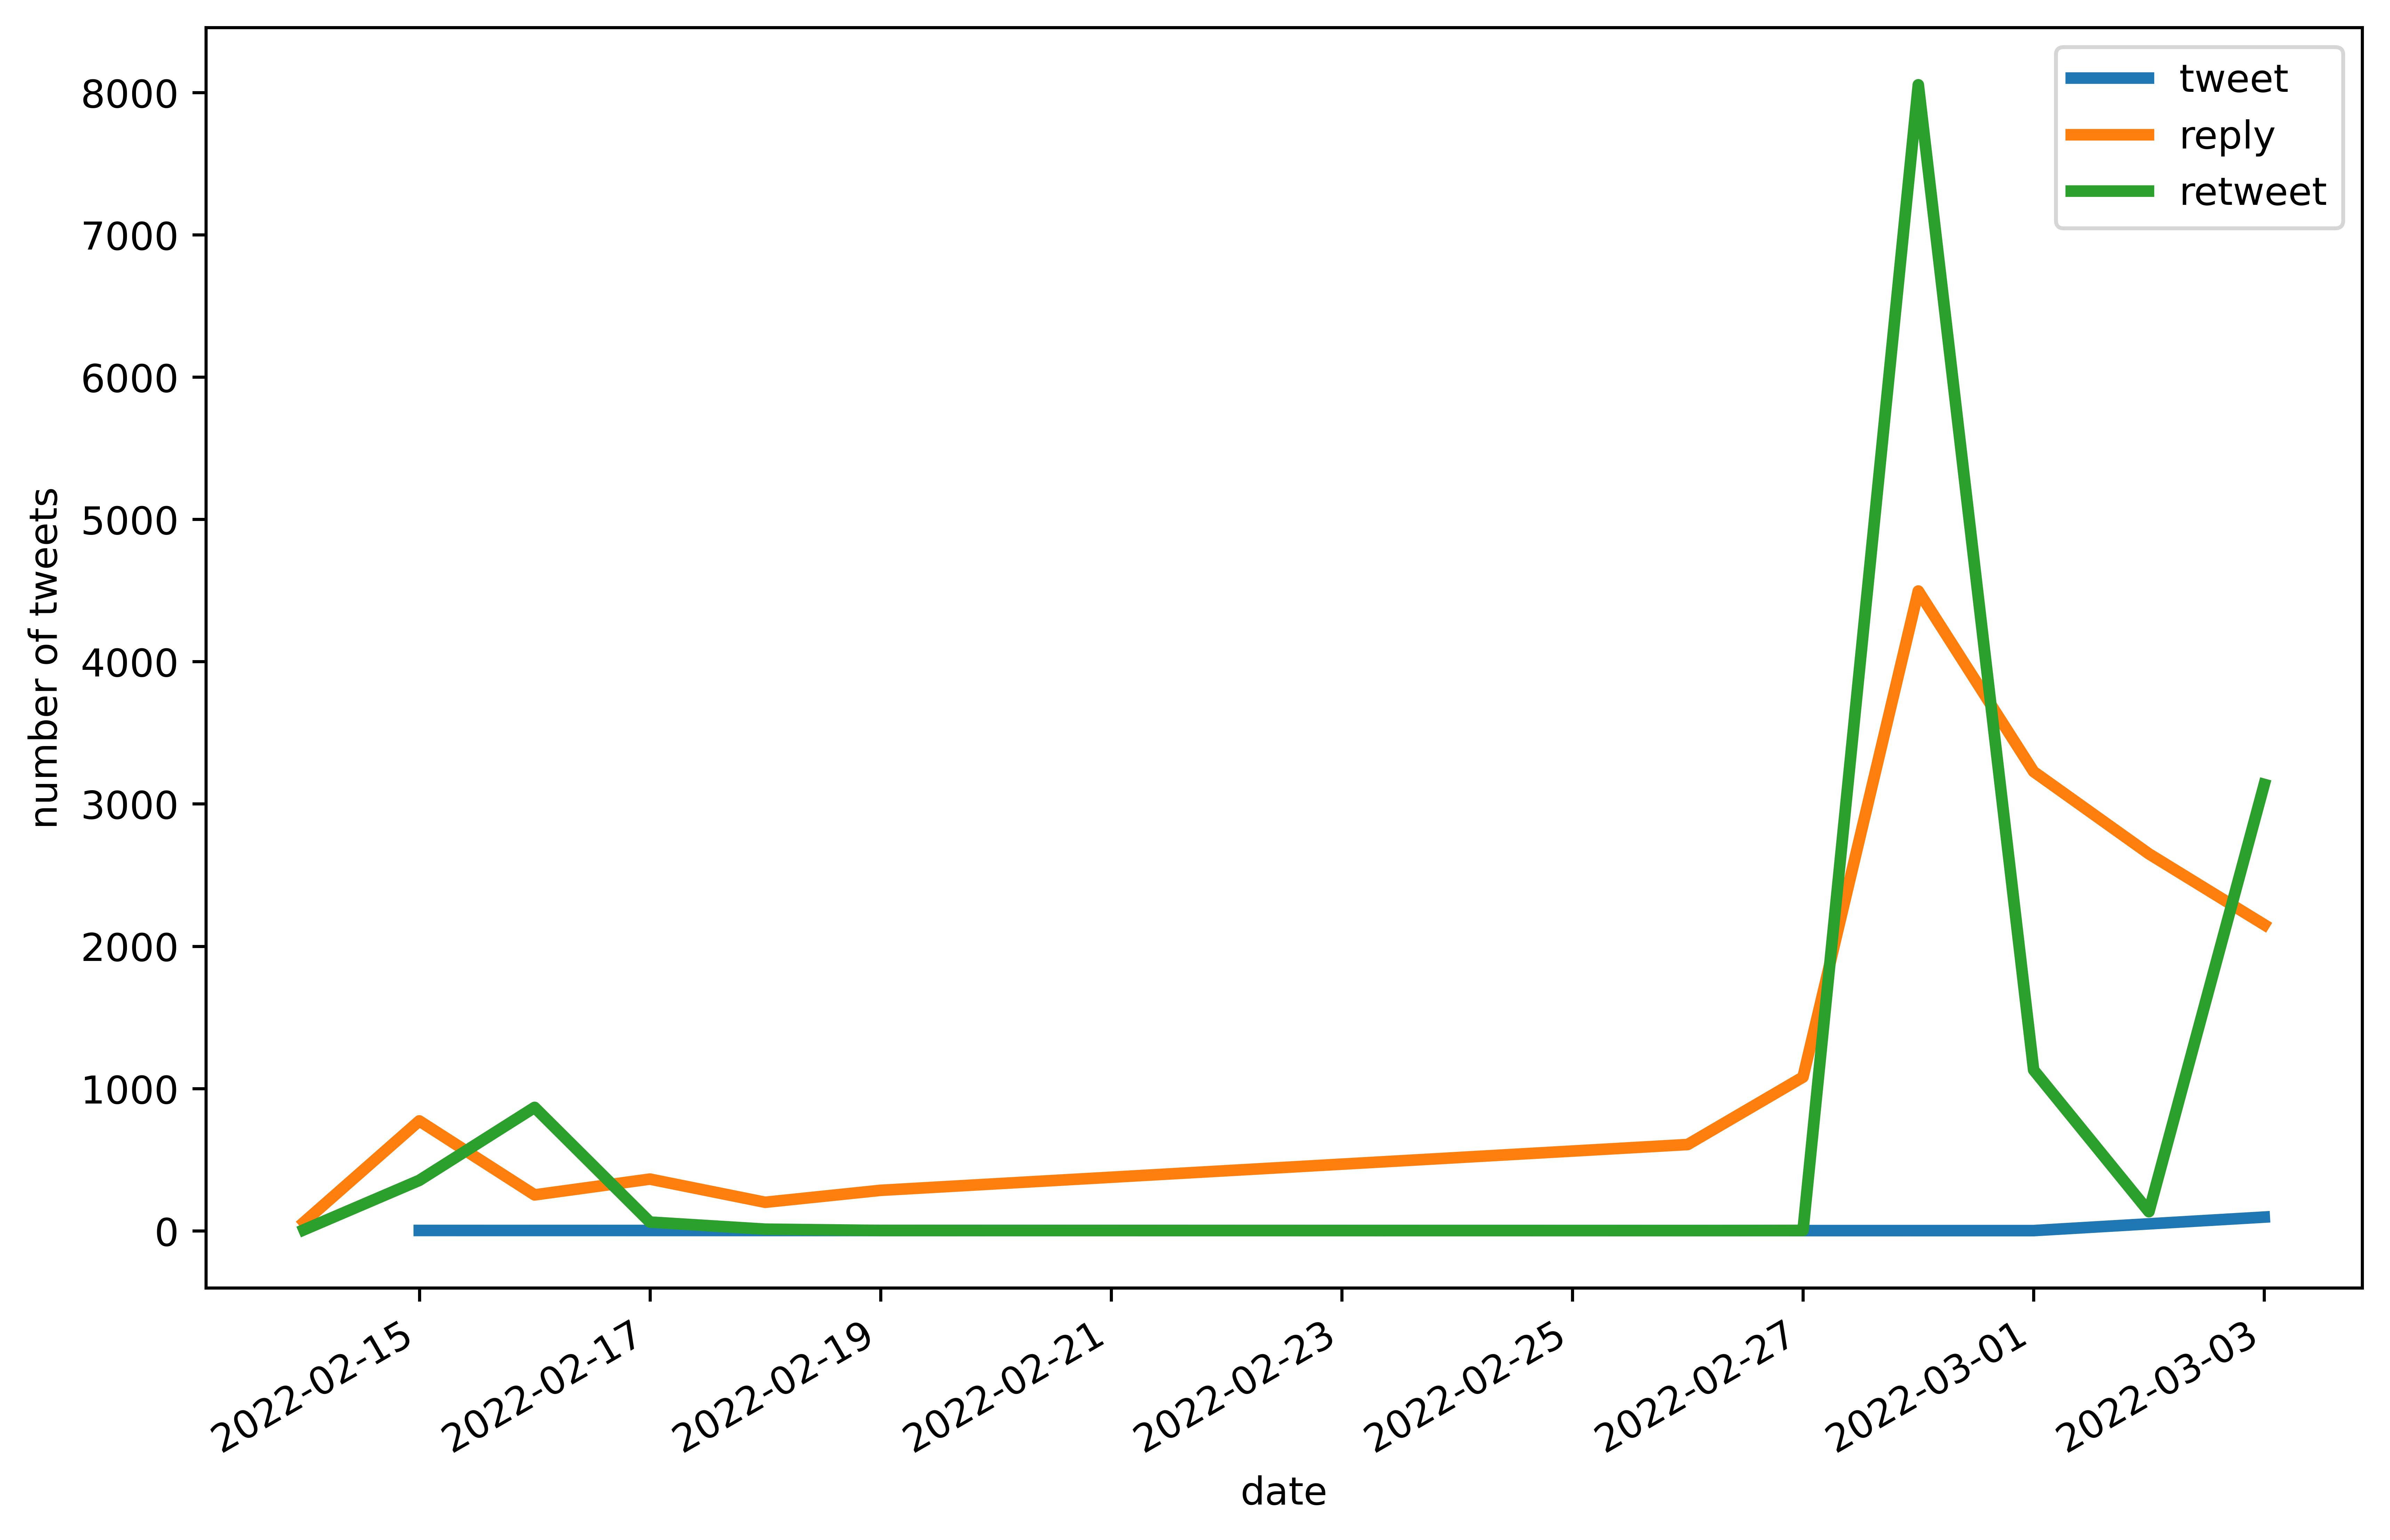

In [7]:
date_tweet_df = to_num_date_df(tweet_df)
date_reply_df = to_num_date_df(reply_df)
date_retweet_df = to_num_date_df(retweet_df)

plt.figure(dpi=200, figsize=(10, 6))
plt.plot(date_tweet_df['date'],date_tweet_df['times'], label="tweet", linewidth=3)
plt.plot(date_reply_df['date'],date_reply_df['times'], label="reply", linewidth=3)
plt.plot(date_retweet_df['date'],date_retweet_df['times'], label="retweet", linewidth=3)
#
# plt.vlines(x=np.datetime64('2017-05-01'), ymin=0, ymax=70000, linestyle='dashed', linewidth=2, colors="r")
# plt.vlines(x=np.datetime64('2017-05-03'), ymin=0, ymax=74000, linestyle='dashed', linewidth=2, colors="r")
# plt.vlines(x=np.datetime64('2017-05-05'), ymin=0, ymax=61000, linestyle='dashed', linewidth=2, colors="r")
# plt.vlines(x=np.datetime64('2017-05-07'), ymin=0, ymax=80000, linestyle='dashed', linewidth=2, colors="r")
# plt.vlines(x=np.datetime64('2017-05-08'), ymin=0, ymax=56000, linestyle='dashed', linewidth=2, colors="r")
# plt.vlines(x=np.datetime64('2017-05-13'), ymin=0, ymax=26000, linestyle='dashed', linewidth=2, colors="r")
# plt.vlines(x=np.datetime64('2017-05-19'), ymin=0, ymax=20000, linestyle='dashed', linewidth=2, colors="r")

# plt.yscale("log")
# plt.grid(True)
plt.xlabel("date")
plt.ylabel("number of tweets")
# plt.ylim(0, 90000)
plt.xticks(rotation=30, ha='right')
# plt.title("Distribution of tweet, retweet and reply over date (part)")
plt.legend()
# plt.savefig("times_5k")
plt.show()

In [8]:
emotion_features_raw = []
for row in tqdm(filter_df.itertuples(), total=len(filter_df)):
    annotate_dicts = row[7]
    emotion_dict = {}
    for annotate_dict in annotate_dicts:
        emotion_type = annotate_dict["text"]
        confidence = annotate_dict["confidence"]
        emotion_dict[emotion_type] = confidence
    emotion_features_raw.append(emotion_dict)

emotion_features_df = pd.DataFrame(emotion_features_raw, index=filter_df.index)
emotion_df = pd.concat([filter_df, emotion_features_df], axis=1)
emotion_df

100%|██████████| 30000/30000 [00:00<00:00, 217974.24it/s]


,id,contentText,timePublished,timePublished2,date,engagementType,annotate_emotion,"Anger, Hate, Contempt, Disgust","Embarrassment, Guilt, Shame, Sadness","Admiration, Love","Optimism, Hope","Joy, Happiness","Pride, including National Pride","Fear, Pessimism",Amusement,Positive-other,Negative-other
0,b58ae956612145b5b882fc1c40d2d489361cbf7a,@ZemmourEric GRAND SECRET HISTORIQUE https://t...,1644889505000,2022-02-14 17:45:05,2022-02-14,reply,[{'id': 'b58ae956612145b5b882fc1c40d2d489361cb...,0.008769,0.002361,0.207196,0.003512,0.003338,0.004597,0.002774,0.025845,0.052544,0.007294
12750,b8caf980e07e5fb317dc37bd54ad4f22e8faf96d,@yjadot_eng But he would be so keen to turn th...,1644907954000,2022-02-14 22:52:34,2022-02-14,reply,[{'id': 'b8caf980e07e5fb317dc37bd54ad4f22e8faf...,0.003637,0.002085,0.290319,0.547544,0.002592,0.038649,0.002217,0.002132,0.390749,0.002495
13500,abf39995020b402fc4b72151c45fef83dcbf0968,@EmmanuelMacron Ok Nelson Monfort,1644895218000,2022-02-14 19:20:18,2022-02-14,reply,[{'id': 'abf39995020b402fc4b72151c45fef83dcbf0...,0.025216,0.002958,0.006953,0.002236,0.002196,0.002118,0.003076,0.295368,0.009439,0.084056
25501,f217528725e98c98c801450a0dbfa59430768fdf,@ZemmourEric GRAND REMPLACEMENT https://t.co/m...,1644889228000,2022-02-14 17:40:28,2022-02-14,reply,[{'id': 'f217528725e98c98c801450a0dbfa59430768...,0.016895,0.012852,0.476611,0.038106,0.060166,0.012970,0.004172,0.027968,0.201053,0.019759
25500,a64d8e4d8d35738533e3c4174a1a895d6df5a920,@partisocialiste @Anne_Hidalgo @2022avecHidalg...,1644894766000,2022-02-14 19:12:46,2022-02-14,reply,[{'id': 'a64d8e4d8d35738533e3c4174a1a895d6df5a...,0.002964,0.002003,0.376741,0.010334,0.003347,0.003003,0.002014,0.006578,0.448461,0.006255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11370,2066dd26824fdc63865f62cd6cee1bcfece62864,@EmmanuelMacron STOP RUSSIAN AGGRESSION AGAINS...,1646302350000,2022-03-03 02:12:30,2022-03-03,reply,[{'id': '2066dd26824fdc63865f62cd6cee1bcfece62...,0.547664,0.010905,0.005478,0.014649,0.001966,0.092302,0.011111,0.002147,0.067141,0.095841
11371,eafd16ac7cf4c5d3d867bd31611722506db70f77,#assault,1646308150000,2022-03-03 03:49:10,2022-03-03,reply,[{'id': 'eafd16ac7cf4c5d3d867bd31611722506db70...,0.544027,0.095141,0.002527,0.001952,0.002070,0.001957,0.069066,0.055742,0.002776,0.099863
11372,2e20995a4f2429765e47f9255abaf7086c819764,@Anne_Hidalgo #MelenchonPresident2022,1646304147000,2022-03-03 02:42:27,2022-03-03,reply,[{'id': '2e20995a4f2429765e47f9255abaf7086c819...,0.002230,0.001969,0.101855,0.099341,0.003180,0.007720,0.001983,0.002191,0.286803,0.002553
11355,49b0cc1d5d4d21b158e3704578cd736c0fc2aa77,YAAAAAAAA,1646326610000,2022-03-03 08:56:50,2022-03-03,reply,[{'id': '49b0cc1d5d4d21b158e3704578cd736c0fc2a...,0.651917,0.011453,0.002581,0.002109,0.002345,0.002291,0.013866,0.013955,0.003138,0.122663


In [9]:
emotions = [
    "Anger, Hate, Contempt, Disgust",
    "Embarrassment, Guilt, Shame, Sadness",
    "Admiration, Love",
    "Optimism, Hope",
    "Joy, Happiness",
    "Pride, including National Pride",
    "Fear, Pessimism",
    "Amusement",
    "Positive-other",
    "Negative-other"
]

date_list_temp = emotion_df["date"].tolist()
date_set = set(date_list_temp)
date_list = list(date_set)
print(date_list)

emotion_date_list = []
for emotion in emotions:
    emotion_date_dict = {}
    for date in date_list:
        date_emotion_df = emotion_df[emotion_df["date"] == date]
        num_data_point = len(date_emotion_df)
        date_emotion_list = date_emotion_df[emotion].tolist()
        sum_date_emotion = sum(date_emotion_list)
        emotion_date_dict[date] = sum_date_emotion / num_data_point
    emotion_date_list.append(emotion_date_dict)

emotion_date_df_list = []
for emotion_date_dict in emotion_date_list:
    date_df = pd.DataFrame(list(emotion_date_dict.items()),
                      columns=['date','avg_confidence'])
    date_df = date_df.sort_values(by='date')
    emotion_date_df_list.append(date_df)

emotion_date_df_dict = {}
for i in range(len(emotions)):
    emotion_date_df_dict[emotions[i]] = emotion_date_df_list[i]
emotion_date_df_dict

[datetime.date(2022, 2, 15), datetime.date(2022, 3, 3), datetime.date(2022, 2, 19), datetime.date(2022, 2, 18), datetime.date(2022, 2, 26), datetime.date(2022, 2, 27), datetime.date(2022, 2, 16), datetime.date(2022, 2, 14), datetime.date(2022, 2, 28), datetime.date(2022, 3, 2), datetime.date(2022, 3, 1), datetime.date(2022, 2, 17)]


{'Anger, Hate, Contempt, Disgust':           date  avg_confidence
 7   2022-02-14        0.146943
 0   2022-02-15        0.094255
 6   2022-02-16        0.107622
 11  2022-02-17        0.149630
 3   2022-02-18        0.108019
 2   2022-02-19        0.111494
 4   2022-02-26        0.229392
 5   2022-02-27        0.260562
 8   2022-02-28        0.168992
 10  2022-03-01        0.327001
 9   2022-03-02        0.265007
 1   2022-03-03        0.390104,
 'Embarrassment, Guilt, Shame, Sadness':           date  avg_confidence
 7   2022-02-14        0.027841
 0   2022-02-15        0.013380
 6   2022-02-16        0.016655
 11  2022-02-17        0.027397
 3   2022-02-18        0.013664
 2   2022-02-19        0.022220
 4   2022-02-26        0.056372
 5   2022-02-27        0.036687
 8   2022-02-28        0.012045
 10  2022-03-01        0.021033
 9   2022-03-02        0.043394
 1   2022-03-03        0.025079,
 'Admiration, Love':           date  avg_confidence
 7   2022-02-14        0.091992
 0   202

In [10]:
plt.style.use("default")

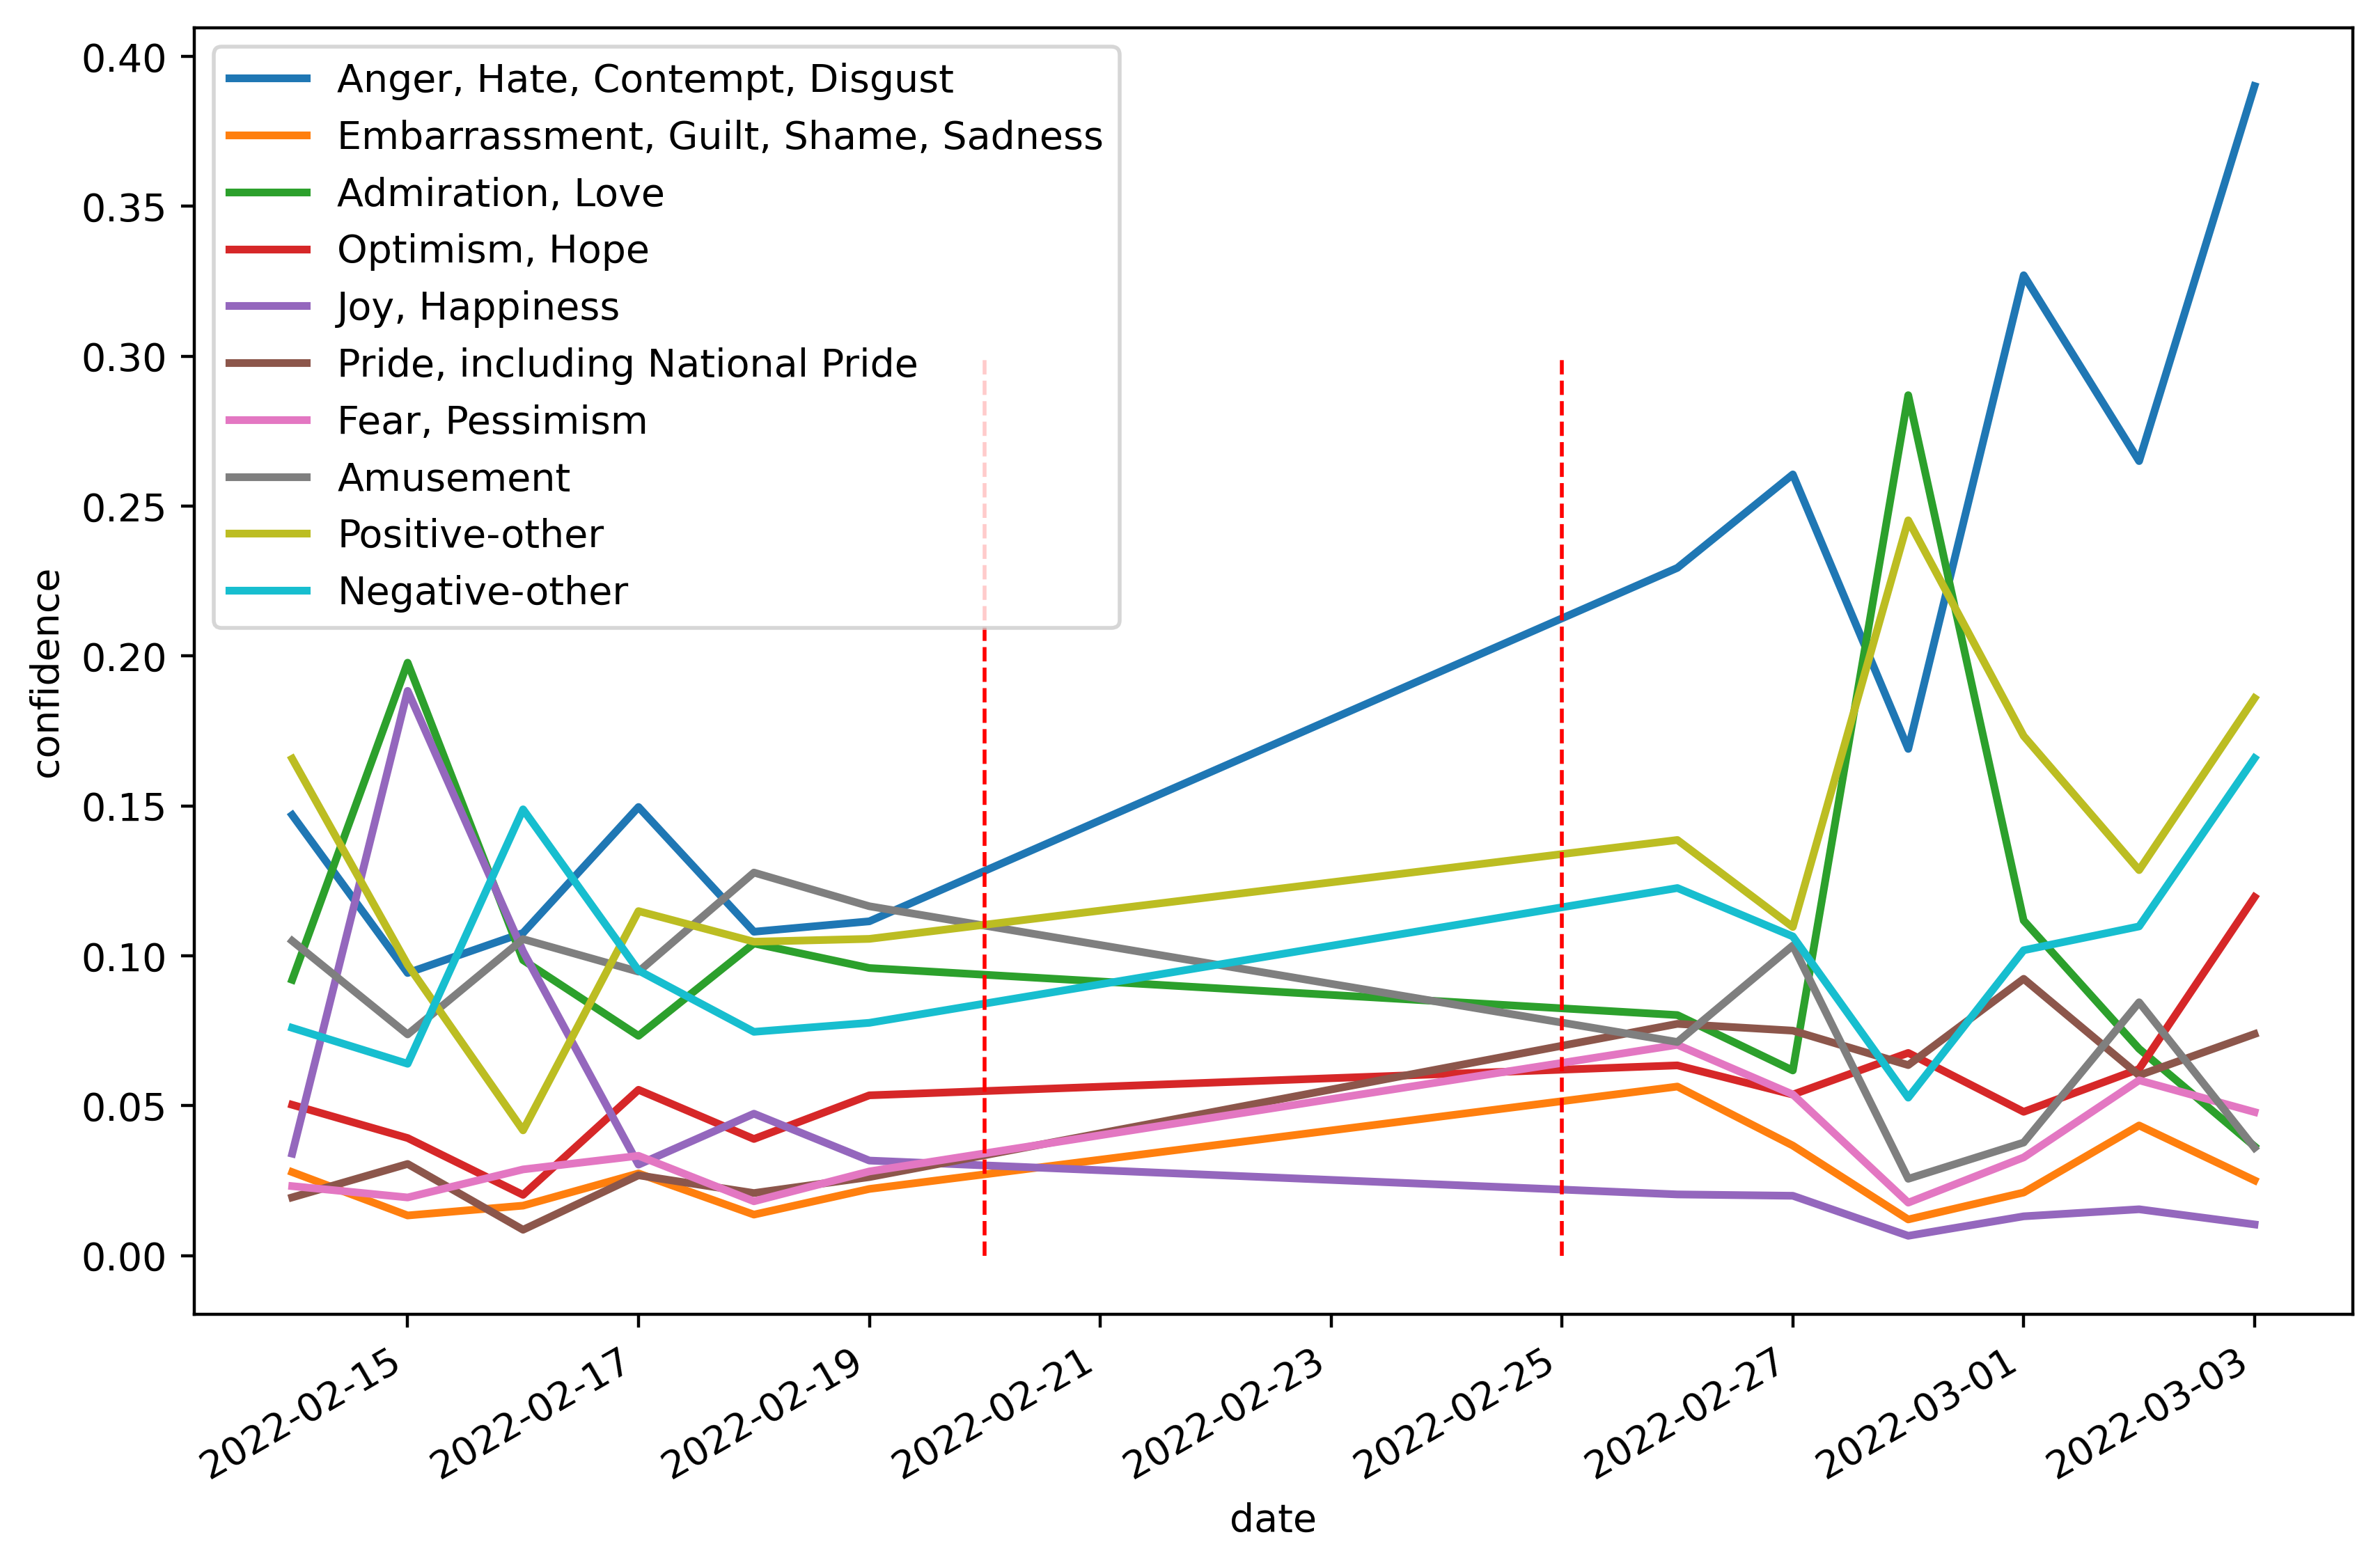

In [11]:
plt.figure(dpi=400, figsize=(10,6))
for k, v in emotion_date_df_dict.items():
    plt.plot(v['date'],v['avg_confidence'], linewidth=2, label=k)

plt.vlines(x=np.datetime64('2022-02-20'), ymin=0, ymax=0.3, linestyle='dashed', linewidth=1, colors="r")
plt.vlines(x=np.datetime64('2022-02-25'), ymin=0, ymax=0.3, linestyle='dashed', linewidth=1, colors="r")

plt.xlabel("date")
plt.ylabel("confidence")
plt.xticks(rotation=30, ha='right')
plt.legend()
plt.show()

In [12]:
tweet_df = emotion_df[emotion_df["engagementType"] == "tweet"]
reply_df = emotion_df[emotion_df["engagementType"] == "reply"]
retweet_df = emotion_df[emotion_df["engagementType"] == "retweet"]

In [13]:
date_list_temp = tweet_df["date"].tolist()
date_set = set(date_list_temp)
date_list = list(date_set)
print(date_list)

emotion_date_list = []
for emotion in emotions:
    emotion_date_dict = {}
    for date in date_list:
        date_emotion_df = tweet_df[tweet_df["date"] == date]
        num_data_point = len(date_emotion_df)
        date_emotion_list = date_emotion_df[emotion].tolist()
        sum_date_emotion = sum(date_emotion_list)
        emotion_date_dict[date] = sum_date_emotion / num_data_point
    emotion_date_list.append(emotion_date_dict)

emotion_date_df_list = []
for emotion_date_dict in emotion_date_list:
    date_df = pd.DataFrame(list(emotion_date_dict.items()),
                      columns=['date','avg_confidence'])
    date_df = date_df.sort_values(by='date')
    emotion_date_df_list.append(date_df)

emotion_date_df_dict2 = {}
for i in range(len(emotions)):
    emotion_date_df_dict2[emotions[i]] = emotion_date_df_list[i]
emotion_date_df_dict2

[datetime.date(2022, 2, 15), datetime.date(2022, 3, 1), datetime.date(2022, 3, 3), datetime.date(2022, 2, 28)]


{'Anger, Hate, Contempt, Disgust':          date  avg_confidence
 0  2022-02-15        0.003367
 3  2022-02-28        0.002447
 1  2022-03-01        0.023523
 2  2022-03-03        0.771574,
 'Embarrassment, Guilt, Shame, Sadness':          date  avg_confidence
 0  2022-02-15        0.004706
 3  2022-02-28        0.002050
 1  2022-03-01        0.006924
 2  2022-03-03        0.003879,
 'Admiration, Love':          date  avg_confidence
 0  2022-02-15        0.215598
 3  2022-02-28        0.667902
 1  2022-03-01        0.005081
 2  2022-03-03        0.003319,
 'Optimism, Hope':          date  avg_confidence
 0  2022-02-15        0.167087
 3  2022-02-28        0.030938
 1  2022-03-01        0.002163
 2  2022-03-03        0.004440,
 'Joy, Happiness':          date  avg_confidence
 0  2022-02-15        0.225567
 3  2022-02-28        0.003436
 1  2022-03-01        0.002783
 2  2022-03-03        0.001966,
 'Pride, including National Pride':          date  avg_confidence
 0  2022-02-15        0.

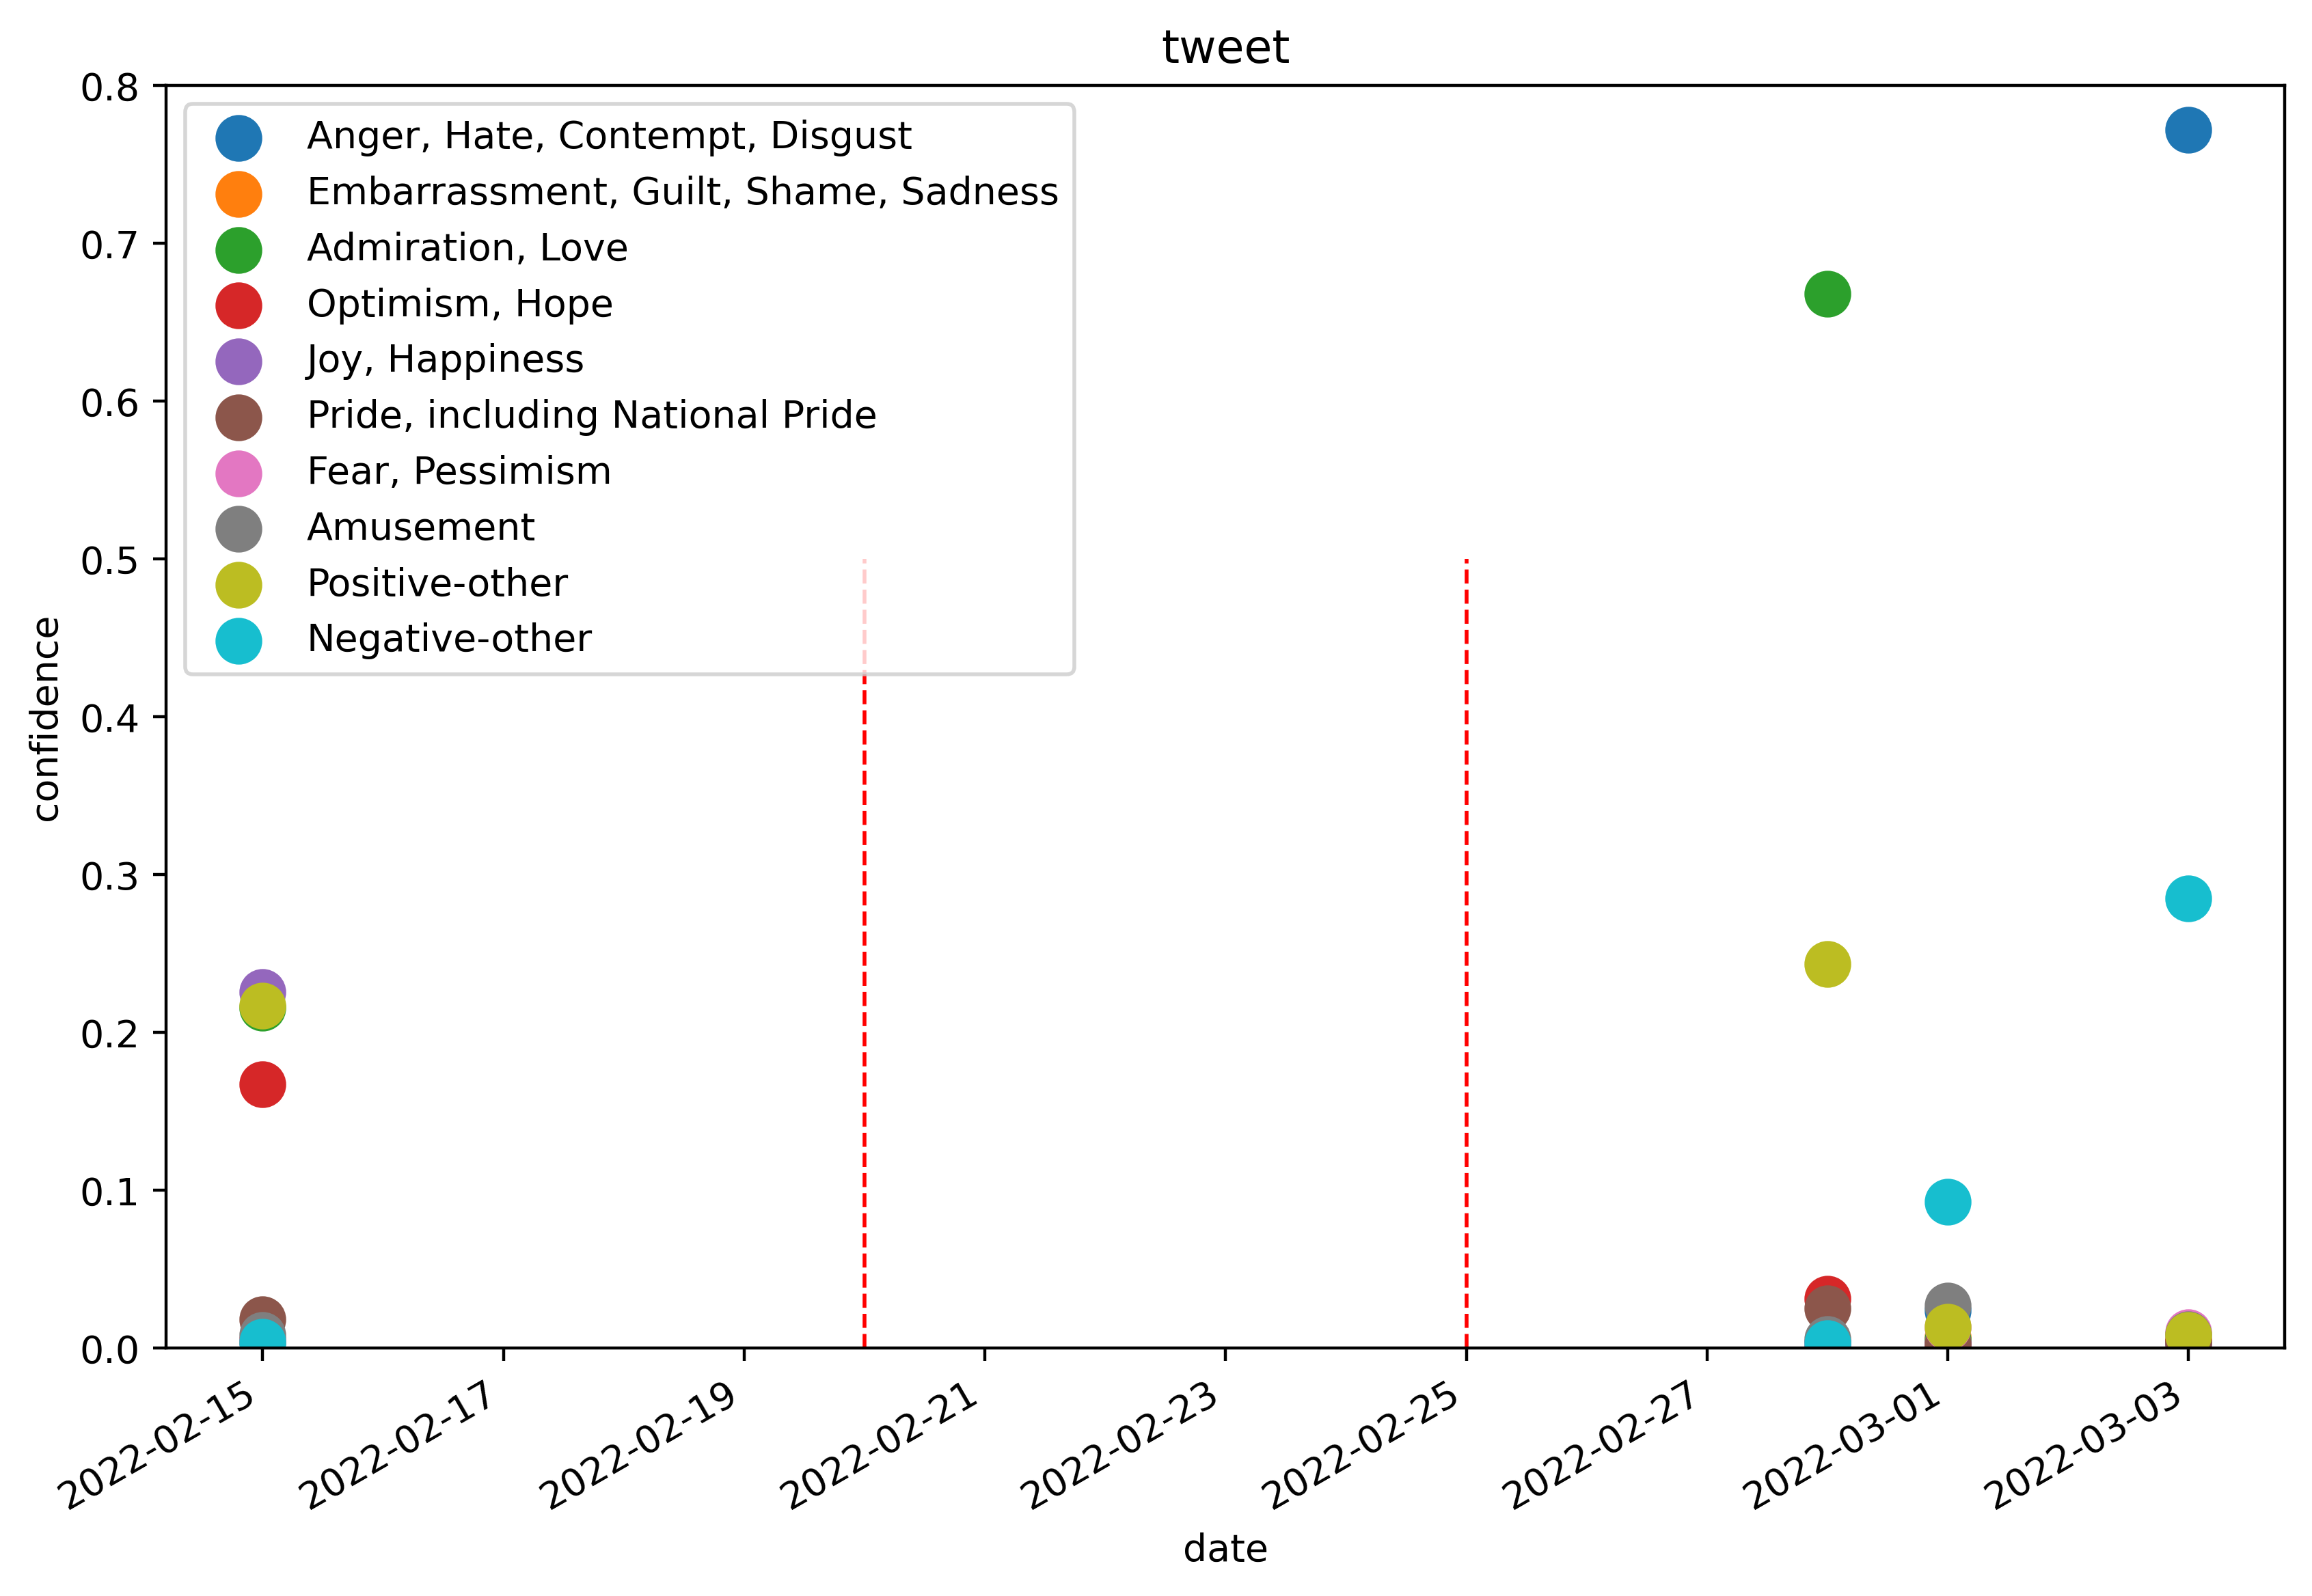

In [14]:
plt.figure(dpi=400, figsize=(10,6))
for k, v in emotion_date_df_dict2.items():
    plt.scatter(v['date'],v['avg_confidence'], label=k, s=128)

plt.vlines(x=np.datetime64('2022-02-20'), ymin=0, ymax=0.5, linestyle='dashed', linewidth=1, colors="r")
plt.vlines(x=np.datetime64('2022-02-25'), ymin=0, ymax=0.5, linestyle='dashed', linewidth=1, colors="r")

plt.xlabel("date")
plt.ylabel("confidence")
plt.ylim(0, 0.8)
plt.xticks(rotation=30, ha='right')
plt.title("tweet")
plt.legend()
plt.show()